In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv('/content/ACME-HappinessSurvey2020.csv')
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


##Data Cleaning

####Create a copy of base data for manupulation & pre- processing

In [4]:
happycustomer_data = data.copy()

In [5]:
happycustomer_data

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [6]:
happycustomer_data.shape

(126, 7)

In [7]:
happycustomer_data = happycustomer_data.replace({'Unhappy': {0: 'Happy',1: 'Happy'}})

In [8]:
happycustomer_data.head

<bound method NDFrame.head of      Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]>

In [9]:
pd.set_option('display.max_columns',None)
happycustomer_data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [10]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

#Normalize the data
sc=MinMaxScaler()
happycustomer_data_n=sc.fit_transform(happycustomer_data.iloc[:,:-1])

In [11]:
happycustomer_data.dtypes

Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

####Check the distribution of target variable

In [12]:
happycustomer_data['Y'].value_counts()

1    69
0    57
Name: Y, dtype: int64

##Declare feature vector and target variable

In [13]:
X = happycustomer_data.loc[:,happycustomer_data.columns!='Y']
y = happycustomer_data['Y']

In [14]:
X.shape

(126, 6)

#Split dataset into training and test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

##Data Visulization

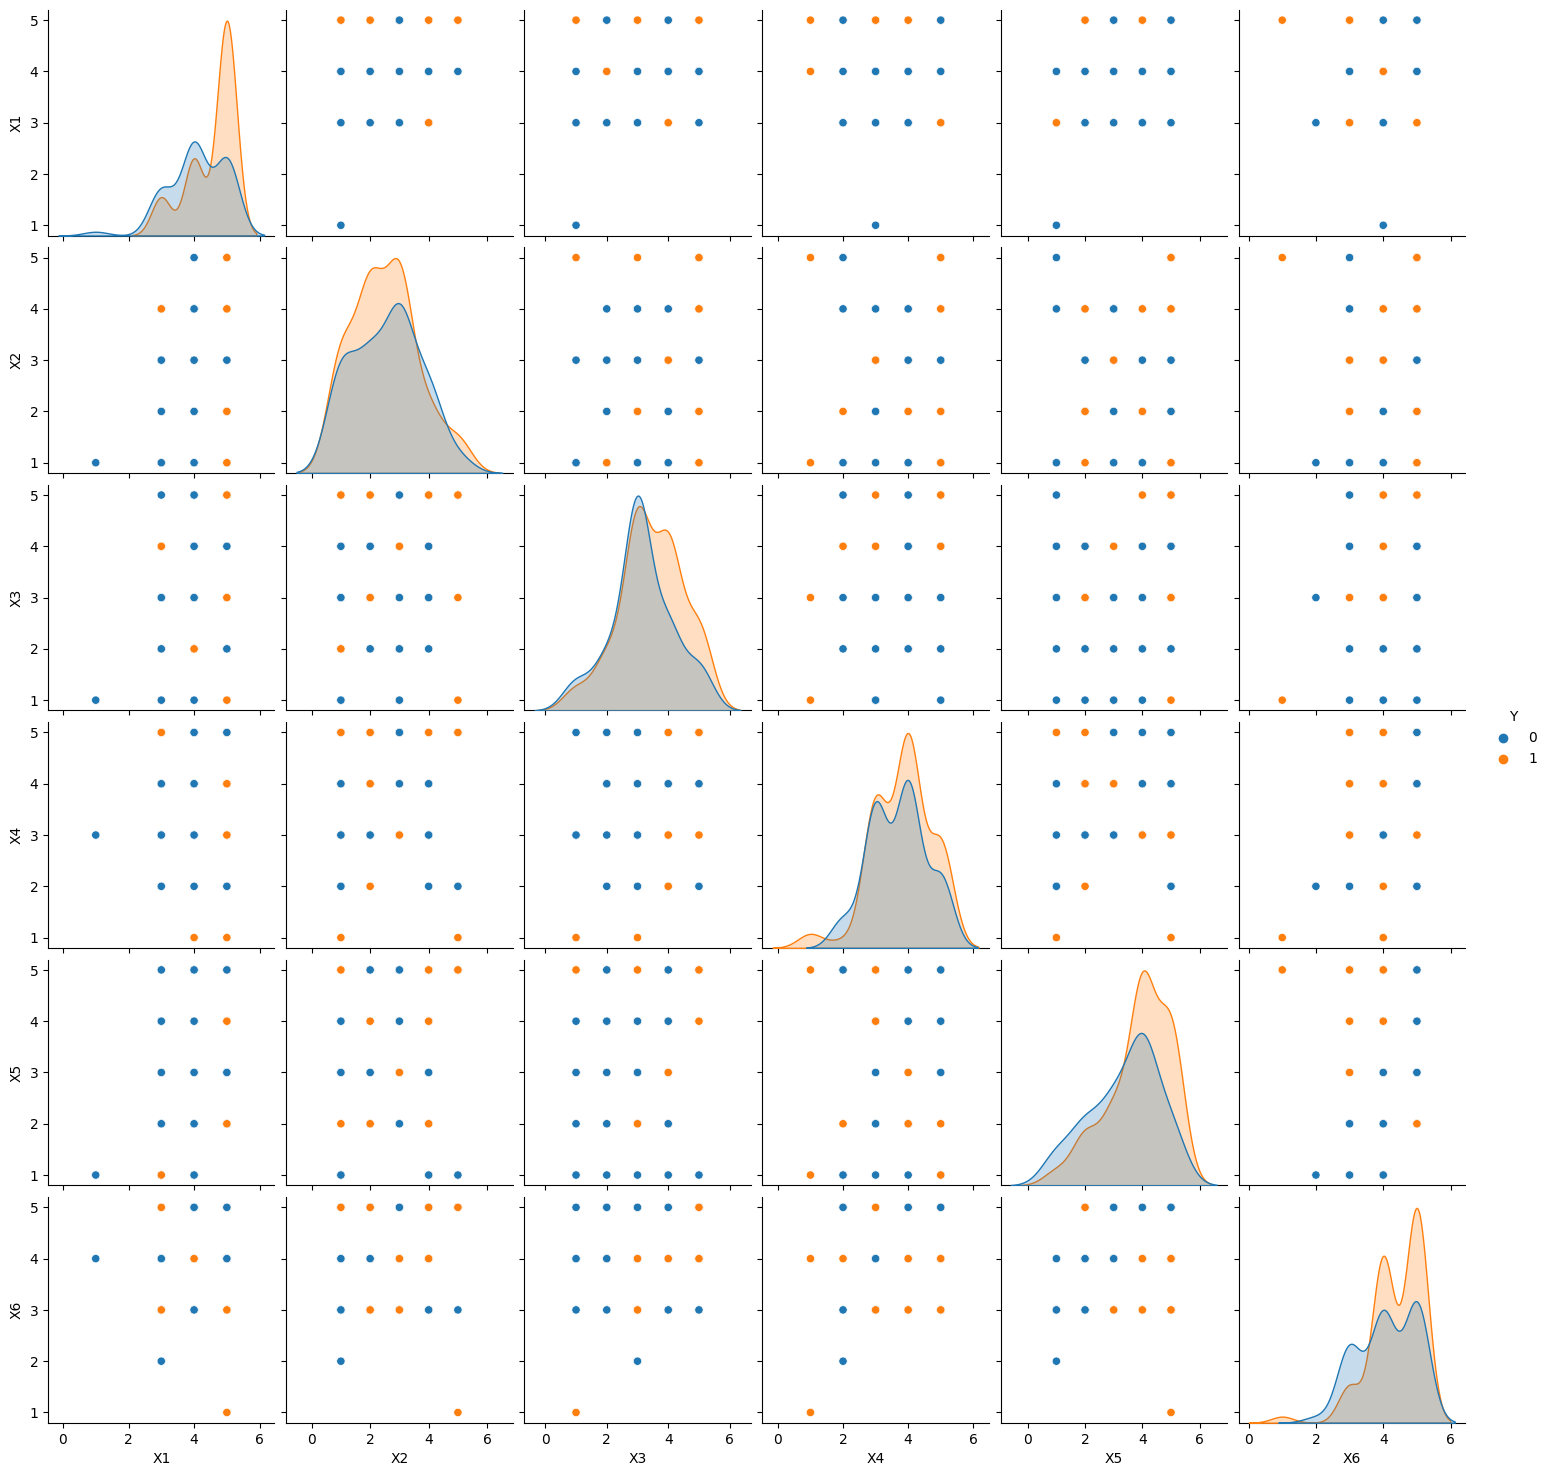

In [16]:
#pairplot
sns.pairplot(happycustomer_data,hue='Y')

<Axes: xlabel='X1', ylabel='Y'>

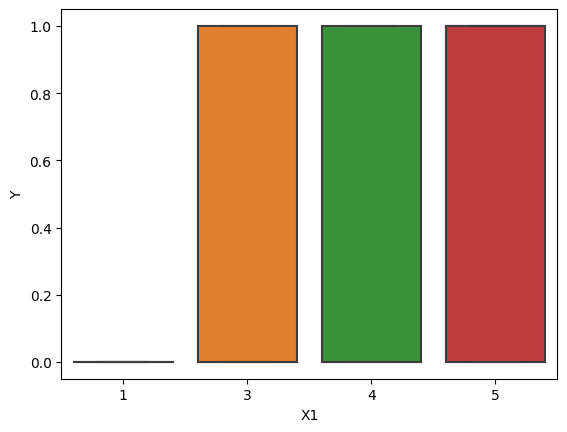

In [17]:
sns.boxplot(x='X1',y='Y',data=happycustomer_data)

<Axes: xlabel='X2', ylabel='Y'>

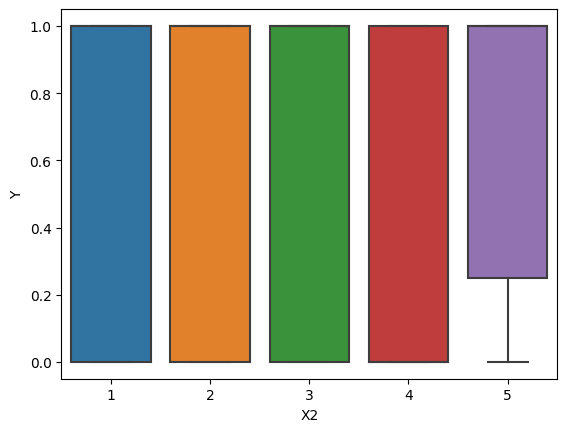

In [18]:
sns.boxplot(x='X2',y='Y',data=happycustomer_data)

<Axes: xlabel='X3', ylabel='Y'>

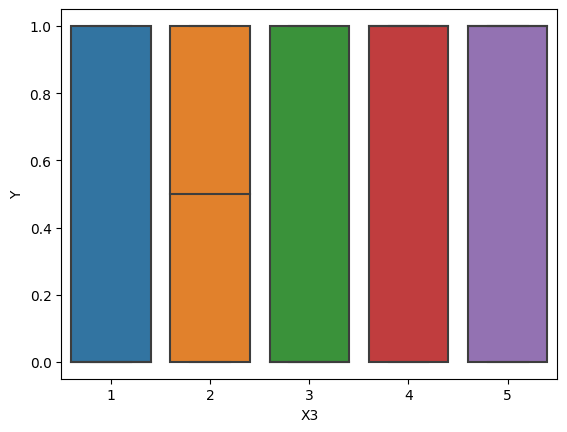

In [19]:
sns.boxplot(x='X3',y='Y',data=happycustomer_data)


<Axes: xlabel='X4', ylabel='Y'>

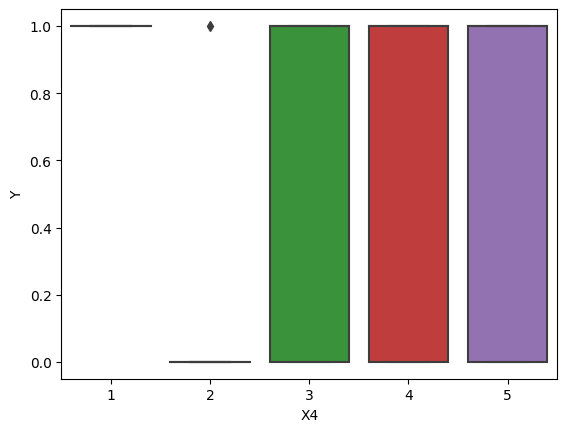

In [20]:
sns.boxplot(x='X4',y='Y',data=happycustomer_data)

<Axes: xlabel='X5', ylabel='Y'>

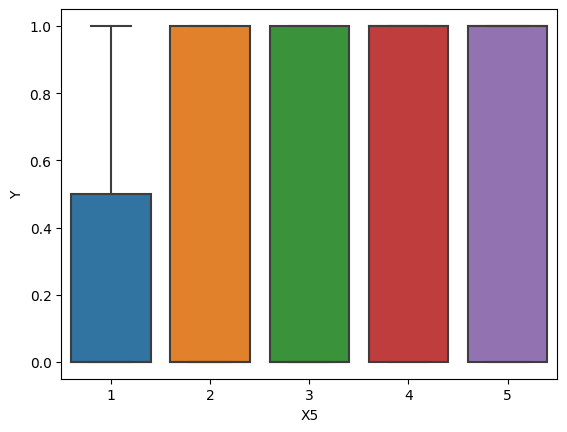

In [21]:
sns.boxplot(x='X5',y='Y',data=happycustomer_data)

<Axes: xlabel='X6', ylabel='Y'>

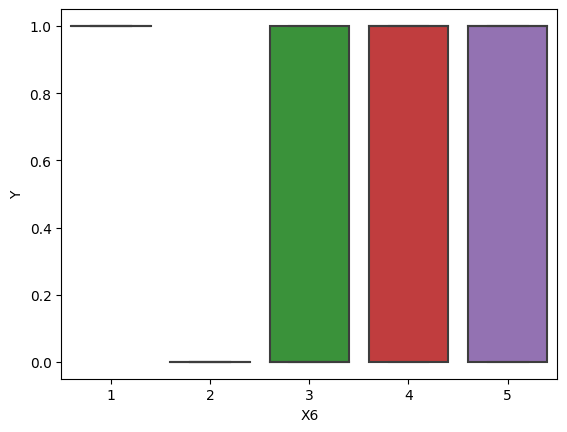

In [22]:
sns.boxplot(x='X6',y='Y',data=happycustomer_data)

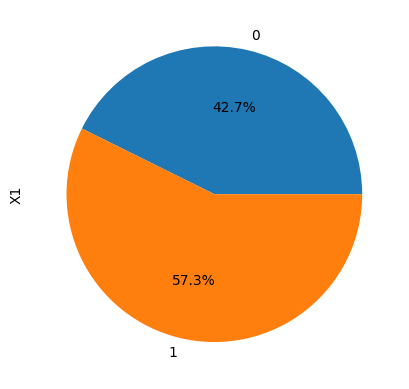

In [23]:
#pie plot
happycustomer_data_X1=happycustomer_data[['X1','Y']].groupby('Y').sum()
happycustomer_data_X1['X1'].plot(kind='pie',autopct='%1.1f%%')
plt.show()

## Initialize Setup

In [24]:
!pip install pycaret

##1. Data Repository

In [25]:
#import dataset
from pycaret.datasets import get_data

In [26]:
from pycaret.classification import *
clf = setup(data = happycustomer_data, target = "Y")

,Description,Value
0,Session id,383
1,Target,Y
2,Target type,Binary
3,Original data shape,"(126, 7)"
4,Transformed data shape,"(126, 7)"
5,Transformed train set shape,"(88, 7)"
6,Transformed test set shape,"(38, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


##Create Model

In [27]:
from pycaret.classification import *
clf1 = setup(happycustomer_data, target = 'Y', session_id=123, log_experiment=False)


,Description,Value
0,Session id,123
1,Target,Y
2,Target type,Binary
3,Original data shape,"(126, 7)"
4,Transformed data shape,"(126, 7)"
5,Transformed train set shape,"(88, 7)"
6,Transformed test set shape,"(38, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


###Compare Baseline

In [28]:
top5 = compare_models(n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6028,0.5981,0.7050,0.6235,0.6471,0.1827,0.1988,0.1020
gbc,Gradient Boosting Classifier,0.5819,0.5850,0.6650,0.6226,0.6321,0.1378,0.1320,0.1990
lightgbm,Light Gradient Boosting Machine,0.5708,0.6481,0.6450,0.6188,0.6254,0.1190,0.1226,0.1830
ada,Ada Boost Classifier,0.5597,0.5562,0.6500,0.5955,0.6116,0.0978,0.1027,0.1980
rf,Random Forest Classifier,0.5500,0.5775,0.6450,0.6075,0.6057,0.0691,0.0738,0.5020
xgboost,Extreme Gradient Boosting,0.5486,0.5538,0.6250,0.5796,0.5867,0.0773,0.0821,0.1150
dummy,Dummy Classifier,0.5444,0.5000,1.0000,0.5444,0.7048,0.0000,0.0000,0.0600
dt,Decision Tree Classifier,0.5431,0.5512,0.6400,0.5282,0.5681,0.0711,0.0621,0.0560
nb,Naive Bayes,0.5403,0.5950,0.6350,0.5867,0.6004,0.0579,0.0617,0.0510
qda,Quadratic Discriminant Analysis,0.5389,0.5600,0.6300,0.5663,0.5828,0.0565,0.0697,0.0430


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [29]:
top5_tuned = [tune_model(i) for i in top5]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.5750,0.2000,0.5000,0.2857,-0.0465,-0.0598
1,0.6667,0.6500,0.8000,0.6667,0.7273,0.3077,0.3162
2,0.6667,0.9250,1.0000,0.6250,0.7692,0.2703,0.3953
3,0.4444,0.5250,0.6000,0.5000,0.5455,-0.1538,-0.1581
4,0.5556,0.7000,0.6000,0.6000,0.6000,0.1000,0.1000
5,0.6667,0.7750,0.4000,1.0000,0.5714,0.3721,0.4781
6,0.5556,0.6250,0.6000,0.6000,0.6000,0.1000,0.1000
7,0.6667,0.7500,0.6000,0.7500,0.6667,0.3415,0.3500
8,0.6250,0.7188,0.5000,0.6667,0.5714,0.2500,0.2582


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3333,0.4000,0.2000,0.3333,0.2500,-0.2857,-0.3162
1,0.7778,0.9750,0.6000,1.0000,0.7500,0.5714,0.6325
2,0.5556,0.5000,1.0000,0.5556,0.7143,0.0000,0.0000
3,0.3333,0.3500,0.6000,0.4286,0.5000,-0.4211,-0.4781
4,0.4444,0.5250,0.8000,0.5000,0.6154,-0.2162,-0.3162
5,0.6667,0.5750,0.4000,1.0000,0.5714,0.3721,0.4781
6,0.5556,0.4000,0.4000,0.6667,0.5000,0.1429,0.1581
7,0.6667,0.4500,1.0000,0.6250,0.7692,0.2703,0.3953
8,0.8750,0.8750,1.0000,0.8000,0.8889,0.7500,0.7746


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.4000,0.4000,0.5000,0.4444,-0.0976,-0.1000
1,0.6667,0.7250,0.8000,0.6667,0.7273,0.3077,0.3162
2,0.6667,0.5000,1.0000,0.6250,0.7692,0.2703,0.3953
3,0.4444,0.2000,0.8000,0.5000,0.6154,-0.2162,-0.3162
4,0.4444,0.5000,0.8000,0.5000,0.6154,-0.2162,-0.3162
5,0.4444,0.5500,0.4000,0.5000,0.4444,-0.0976,-0.1000
6,0.4444,0.4500,0.4000,0.5000,0.4444,-0.0976,-0.1000
7,0.4444,0.5500,0.8000,0.5000,0.6154,-0.2162,-0.3162
8,0.8750,0.9375,1.0000,0.8000,0.8889,0.7500,0.7746


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5556,0.4000,0.6000,0.6000,0.6000,0.1000,0.1000
1,0.4444,0.5500,0.6000,0.5000,0.5455,-0.1538,-0.1581
2,0.4444,0.7000,0.6000,0.5000,0.5455,-0.1538,-0.1581
3,0.3333,0.1000,0.6000,0.4286,0.5000,-0.4211,-0.4781
4,0.6667,0.7750,0.6000,0.7500,0.6667,0.3415,0.3500
5,0.5556,0.6750,0.8000,0.5714,0.6667,0.0526,0.0598
6,0.5556,0.5250,0.4000,0.6667,0.5000,0.1429,0.1581
7,0.4444,0.6500,0.8000,0.5000,0.6154,-0.2162,-0.3162
8,0.7500,0.8125,0.7500,0.7500,0.7500,0.5000,0.5000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3333,0.5250,0.0000,0.0000,0.0000,-0.2273,-0.3953
1,0.6667,0.8250,0.6000,0.7500,0.6667,0.3415,0.3500
2,0.7778,0.7000,1.0000,0.7143,0.8333,0.5263,0.5976
3,0.6667,0.5500,0.6000,0.7500,0.6667,0.3415,0.3500
4,0.4444,0.5750,0.8000,0.5000,0.6154,-0.2162,-0.3162
5,0.7778,0.8500,0.8000,0.8000,0.8000,0.5500,0.5500
6,0.6667,0.5500,0.6000,0.7500,0.6667,0.3415,0.3500
7,0.5556,0.4000,0.6000,0.6000,0.6000,0.1000,0.1000
8,0.6250,0.7188,0.5000,0.6667,0.5714,0.2500,0.2582


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


##Create Model

In [30]:
lr = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3889,0.4562,0.5000,0.4545,0.4762,-0.2532,-0.2548
1,0.3889,0.4750,0.6000,0.4615,0.5217,-0.2857,-0.3051
2,0.5556,0.5625,0.7000,0.5833,0.6364,0.0769,0.0791
3,0.4118,0.4306,0.5556,0.4545,0.5000,-0.1972,-0.2031
4,0.8235,0.9167,0.8889,0.8000,0.8421,0.6434,0.6480
Mean,0.5137,0.5682,0.6489,0.5508,0.5953,-0.0032,-0.0072
Std,0.1669,0.1798,0.1367,0.1339,0.1351,0.3477,0.3536


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2222,0.3000,0.0000,0.0000,0.0000,-0.4651,-0.5976
1,0.6667,0.6500,0.8000,0.6667,0.7273,0.3077,0.3162
2,0.5556,0.6250,1.0000,0.5556,0.7143,0.0000,0.0000
3,0.8889,0.8750,1.0000,0.8333,0.9091,0.7692,0.7906
4,0.5556,0.5500,0.8000,0.5714,0.6667,0.0526,0.0598
5,0.6667,0.6750,0.6000,0.7500,0.6667,0.3415,0.3500
6,0.4444,0.4500,0.4000,0.5000,0.4444,-0.0976,-0.1000
7,0.5556,0.4500,0.8000,0.5714,0.6667,0.0526,0.0598
8,0.5000,0.5000,0.7500,0.5000,0.6000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.5562,0.5000,0.5000,0.5000,-0.1250,-0.1250
1,0.5000,0.6250,0.8000,0.5333,0.6400,-0.0800,-0.1000
2,0.4444,0.5500,0.4000,0.5000,0.4444,-0.0976,-0.1000
3,0.4706,0.4444,0.6667,0.5000,0.5714,-0.0851,-0.0913
4,0.7647,0.6667,0.6667,0.8571,0.7500,0.5342,0.5494
Mean,0.5248,0.5685,0.6067,0.5781,0.5812,0.0293,0.0266
Std,0.1217,0.0758,0.1405,0.1401,0.1071,0.2529,0.2616


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [34]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm']

In [35]:
ensembled_models = compare_models(include = models(type='ensemble').index.tolist(), fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6379,0.6715,0.7083,0.6690,0.6848,0.2640,0.2637,0.3333
xgboost,Extreme Gradient Boosting,0.6364,0.6239,0.6875,0.6711,0.6725,0.2653,0.2734,0.0500
gbc,Gradient Boosting Classifier,0.5904,0.5928,0.6875,0.6205,0.6448,0.1637,0.1707,0.1833
rf,Random Forest Classifier,0.5801,0.6181,0.6042,0.6341,0.6096,0.1563,0.1622,0.3933
et,Extra Trees Classifier,0.5801,0.6162,0.6250,0.6295,0.6169,0.1522,0.1586,0.2100
ada,Ada Boost Classifier,0.5356,0.5179,0.6250,0.5664,0.5942,0.0545,0.0549,0.2400


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

##Tune Hyperparameters

In [36]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2222,0.3000,0.2000,0.2500,0.2222,-0.5366,-0.5500
1,0.4444,0.4750,0.6000,0.5000,0.5455,-0.1538,-0.1581
2,0.5556,0.5500,0.8000,0.5714,0.6667,0.0526,0.0598
3,0.3333,0.2000,0.6000,0.4286,0.5000,-0.4211,-0.4781
4,0.7778,0.6500,0.8000,0.8000,0.8000,0.5500,0.5500
5,0.5556,0.5000,0.6000,0.6000,0.6000,0.1000,0.1000
6,0.6667,0.6000,0.6000,0.7500,0.6667,0.3415,0.3500
7,0.4444,0.4000,0.6000,0.5000,0.5455,-0.1538,-0.1581
8,0.8750,0.8750,0.7500,1.0000,0.8571,0.7500,0.7746


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [37]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3333,0.5250,0.0000,0.0000,0.0000,-0.2273,-0.3953
1,0.6667,0.8250,0.6000,0.7500,0.6667,0.3415,0.3500
2,0.7778,0.7000,1.0000,0.7143,0.8333,0.5263,0.5976
3,0.6667,0.5500,0.6000,0.7500,0.6667,0.3415,0.3500
4,0.4444,0.5750,0.8000,0.5000,0.6154,-0.2162,-0.3162
5,0.7778,0.8500,0.8000,0.8000,0.8000,0.5500,0.5500
6,0.6667,0.5500,0.6000,0.7500,0.6667,0.3415,0.3500
7,0.5556,0.4000,0.6000,0.6000,0.6000,0.1000,0.1000
8,0.6250,0.7188,0.5000,0.6667,0.5714,0.2500,0.2582


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


##Ensemble Model

In [38]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.4250,0.4000,0.5000,0.4444,-0.0976,-0.1000
1,0.6667,0.7000,0.8000,0.6667,0.7273,0.3077,0.3162
2,0.6667,0.5250,0.8000,0.6667,0.7273,0.3077,0.3162
3,0.5556,0.6750,0.6000,0.6000,0.6000,0.1000,0.1000
4,0.6667,0.5500,1.0000,0.6250,0.7692,0.2703,0.3953
5,0.6667,0.7500,0.6000,0.7500,0.6667,0.3415,0.3500
6,0.5556,0.6250,0.4000,0.6667,0.5000,0.1429,0.1581
7,0.5556,0.4750,0.6000,0.6000,0.6000,0.1000,0.1000
8,0.7500,0.7500,0.7500,0.7500,0.7500,0.5000,0.5000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [39]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2222,0.3500,0.2000,0.2500,0.2222,-0.5366,-0.5500
1,0.5556,0.6000,0.4000,0.6667,0.5000,0.1429,0.1581
2,0.4444,0.6500,0.8000,0.5000,0.6154,-0.2162,-0.3162
3,0.4444,0.5250,0.8000,0.5000,0.6154,-0.2162,-0.3162
4,0.4444,0.5000,0.8000,0.5000,0.6154,-0.2162,-0.3162
5,0.5556,0.5750,0.4000,0.6667,0.5000,0.1429,0.1581
6,0.4444,0.5000,0.4000,0.5000,0.4444,-0.0976,-0.1000
7,0.2222,0.3000,0.4000,0.3333,0.3636,-0.6154,-0.6325
8,0.3750,0.4375,0.5000,0.4000,0.4444,-0.2500,-0.2582


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

##Blend Models

In [40]:
blender = blend_models(estimator_list = [boosted_dt, bagged_dt], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3333,0.2500,0.4000,0.4000,0.4000,-0.3500,-0.3500
1,0.6667,0.6750,0.6000,0.7500,0.6667,0.3415,0.3500
2,0.4444,0.5500,0.8000,0.5000,0.6154,-0.2162,-0.3162
3,0.4444,0.5750,0.8000,0.5000,0.6154,-0.2162,-0.3162
4,0.5556,0.5250,1.0000,0.5556,0.7143,0.0000,0.0000
5,0.5556,0.6750,0.4000,0.6667,0.5000,0.1429,0.1581
6,0.4444,0.6000,0.4000,0.5000,0.4444,-0.0976,-0.1000
7,0.2222,0.3500,0.4000,0.3333,0.3636,-0.6154,-0.6325
8,0.5000,0.6250,0.7500,0.5000,0.6000,0.0000,0.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

##Logistic Regression using Gradient Descent

In [41]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(np.dot(x,w)+b)))
def loss(x,w,y,b):
    s=sigmoid(x,w,b)
    return np.mean(-(y*np.log(s))- ((1-y)*np.log(1-s)))
def grad(x,y,w,b):
    s=sigmoid(x,w,b)
    return np.dot(x.T,(s-y))/x.shape[0]

In [42]:
def accuracy(y_pred,y_test):
    return np.mean(y_pred==y_test)

In [43]:
# initilize w and b
def gradientdescent(x,y):
    w=np.zeros((x.shape[1]))
    b=np.zeros(1)
    ite=1000 #number of iteration
    eta=0.7 #learning rate
    loss_v=[]
    for i in range(ite):
        probability=sigmoid(x,w,b)
        l=loss(x,w,y,b)
        gradient=grad(x,y,w,b)
        w=w- (eta*gradient)
        b=b-(eta*np.sum(probability-y)/x.shape[0])
        loss_v.append(l)
        if i%100==0:
            print(l)
    return w,b,loss_v

In [44]:
X = happycustomer_data.loc[:,happycustomer_data.columns!='Y']
y = happycustomer_data['Y']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.334, random_state = 0)

In [46]:
w,b,loss_v=gradientdescent(X,y)
y_pred=sigmoid(X_test,w,b)
for j,i in enumerate(y_pred):
    if i<0.5:
        y_pred[j]=0
    else:
        y_pred[j]=1

print('test accuracy',accuracy(y_pred,y_test))

0.6931471805599454
10.309226489811005
3.6486538922568554
6.80731706744913
4.271559643222642
5.643453520620846
4.504021289384199
5.19577216022331
4.71485794543086
4.9082657102680205
test accuracy 0.46511627906976744


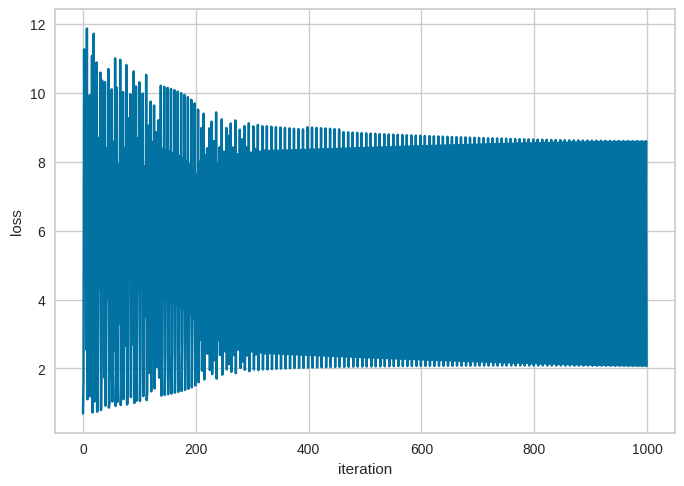

In [47]:
plt.plot(range(len(loss_v)),loss_v)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

##Logistic Regression using Mini-batch SGD

In [48]:
batch_size=8
def sgd(x,y,batch_size):
    # initilize w and b
    w=np.zeros((X_train.shape[1]))
    b=np.zeros(1)
    ite=1000 #number of iteration
    eta=0.7 #learning rate
    loss_v=[]
    for i in range(1000):
        ind=np.random.choice(len(y_train),batch_size)
        x_b=x[ind]
        y_b=y[ind]
        p=sigmoid(x_b,w,b)
        l=loss(x_b,w,y_b,b)
        gradient=grad(x_b,y_b,w,b)
        w=w- (0.1*gradient)
        b=b-(eta*np.sum(p-y_b)/x.shape[0])
        if i%10==0:
            loss_v.append(l)
        if i%100==0:
            print('loss',l)
    return w,b,loss_v

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.334, random_state = 0)

In [50]:
w,b,loss_v=gradientdescent(X,y)
y_pred=sigmoid(X_test,w,b)
for j,i in enumerate(y_pred):
    if i<0.5:
        y_pred[j]=0
    else:
        y_pred[j]=1

print('test accuracy',accuracy(y_pred,y_test))

0.6931471805599454
10.309226489811005
3.6486538922568554
6.80731706744913
4.271559643222642
5.643453520620846
4.504021289384199
5.19577216022331
4.71485794543086
4.9082657102680205
test accuracy 0.46511627906976744


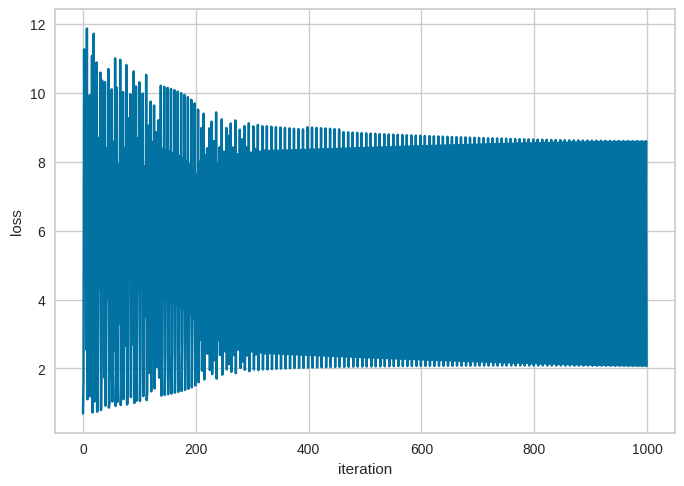

In [51]:
plt.plot(range(len(loss_v)),loss_v)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

##Logistic Regression using SGD with momentum

In [52]:
batch_size=8
def sgdmomentum(x,y,batch_size):
    # initilize w and b
    w=np.zeros((X_train.shape[1]))
    b=np.zeros(1)
    ite=1000 #number of iteration
    eta=0.7 #learning rate
    alpha=0.9
    loss_v=[]
    v_t=np.zeros((X_train.shape[1]))
    v_b=np.zeros(1)
    for i in range(1000):
        ind=np.random.choice(len(y_train),batch_size)
        x_b=x[ind]
        y_b=y[ind]
        p=sigmoid(x_b,w,b)
        l=loss(x_b,w,y_b,b)
        gradient=grad(x_b,y_b,w,b)
        v_t =(alpha*v_t) + (eta*gradient)
        w=w-v_t
        v_b=(alpha*v_b) + (eta*np.sum(p-y_b)/x.shape[0])
        b=b-v_b
        if i%10==0:
            loss_v.append(l)
        if i%100==0:
            print('loss',l)
    return w,b,loss_v

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [54]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.56      0.24      0.33        21
           1       0.45      0.76      0.57        17

    accuracy                           0.47        38
   macro avg       0.50      0.50      0.45        38
weighted avg       0.51      0.47      0.44        38



In [57]:
w,b,loss_v=sgdmomentum(X,y,32)

KeyError: ignored

In [58]:
#Predction
y_pred=sigmoid(X_test,w,b)
for j,i in enumerate(y_pred):
    if i<0.5:
        y_pred[j]=0
    else:
        y_pred[j]=1

print('test accuracy',accuracy(y_pred,y_test))

test accuracy 0.4473684210526316


##Logistic Regression using Using sklearn

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model= LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('test accuracy',accuracy(y_pred,y_test))

test accuracy 0.47368421052631576


##LightGBM Model Development and Training

In [61]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 52, number of negative: 36
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.590909 -> initscore=0.367725
[LightGBM] [Info] Start training from score 0.367725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=None, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

##Model Prediction

In [62]:
# predict the results
y_pred=clf.predict(X_test)

##View Accuracy

In [63]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.6316


##Compare train and test set accuracy

In [64]:
y_pred_train = clf.predict(X_train)

In [65]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7273


In [66]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.7273
Test set score: 0.6316


##Confusion-matrix

In [ ]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

<Axes: >

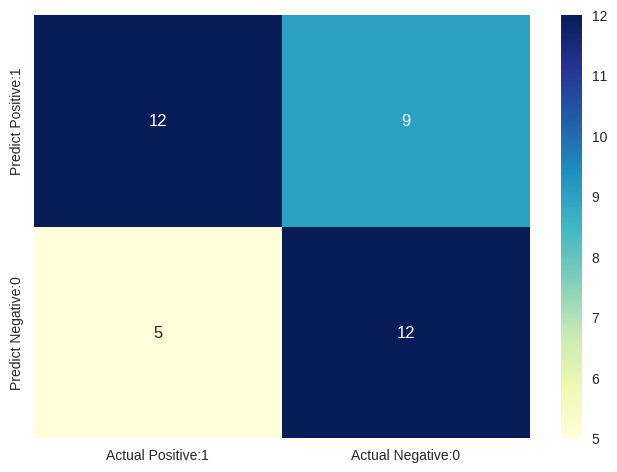

In [68]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##Classification Metrices

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63        21
           1       0.57      0.71      0.63        17

    accuracy                           0.63        38
   macro avg       0.64      0.64      0.63        38
weighted avg       0.65      0.63      0.63        38



##Prediction with Gradient Boosting classifier

In [70]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [72]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 6 to 44
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      88 non-null     int64
 1   X2      88 non-null     int64
 2   X3      88 non-null     int64
 3   X4      88 non-null     int64
 4   X5      88 non-null     int64
 5   X6      88 non-null     int64
dtypes: int64(6)
memory usage: 4.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 8 to 66
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      38 non-null     int64
 1   X2      38 non-null     int64
 2   X3      38 non-null     int64
 3   X4      38 non-null     int64
 4   X5      38 non-null     int64
 5   X6      38 non-null     int64
dtypes: int64(6)
memory usage: 2.1 KB


(None, None)

In [73]:
# generate training target set (ytrain)
y_train

6      0
59     1
104    0
95     1
109    1
      ..
67     0
64     1
117    1
47     0
44     1
Name: Y, Length: 88, dtype: int64

In [74]:
# shapes of train and test sets
y_train.shape, y_test.shape

((88,), (38,))

In [75]:
# join train and test sets to form a new train_test set
#train_test =  y_train.append(y_test)

In [76]:
# transform data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [77]:
from sklearn.model_selection import train_test_split

X_train_sub, X_validation_sub, y_train_sub, y_validation_sub = train_test_split(X_train_scale, y_train, random_state=0)

In [78]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [79]:
# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train_sub, y_train_sub)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_sub, y_train_sub)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation_sub, y_validation_sub)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.712
Accuracy score (validation): 0.409

Learning rate:  0.1
Accuracy score (training): 0.773
Accuracy score (validation): 0.455

Learning rate:  0.25
Accuracy score (training): 0.864
Accuracy score (validation): 0.545

Learning rate:  0.5
Accuracy score (training): 0.894
Accuracy score (validation): 0.500

Learning rate:  0.75
Accuracy score (training): 0.939
Accuracy score (validation): 0.500

Learning rate:  1
Accuracy score (training): 0.924
Accuracy score (validation): 0.500



In [80]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train_sub, y_train_sub)
predictions = gb.predict(X_validation_sub)

print("Confusion Matrix:")
print(confusion_matrix(y_validation_sub, predictions))
print()
print("Classification Report")
print(classification_report(y_validation_sub, predictions))

Confusion Matrix:
[[5 4]
 [7 6]]

Classification Report
              precision    recall  f1-score   support

           0       0.42      0.56      0.48         9
           1       0.60      0.46      0.52        13

    accuracy                           0.50        22
   macro avg       0.51      0.51      0.50        22
weighted avg       0.53      0.50      0.50        22



In [81]:
# ROC curve and Area-Under-Curve (AUC)

y_scores_gb = gb.decision_function(X_validation_sub)
fpr_gb, tpr_gb, _ = roc_curve(y_validation_sub, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.42


##Decision-Tree Algorithm

###Decision Tree Classifier with criterion gini index

In [82]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


In [84]:
import warnings

warnings.filterwarnings('ignore')

In [85]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

##Predict the Test set results with criterion gini index

In [86]:
y_pred_gini = clf_gini.predict(X_test)

##Check accuracy score with criterion gini index

In [87]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.5789


In [88]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [89]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7273


##Check for overfitting and underfitting

In [90]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7273
Test set score: 0.5789


##Visualize decision-trees

[Text(0.5, 0.875, 'x[0] <= 4.5\ngini = 0.483\nsamples = 88\nvalue = [36, 52]'),
 Text(0.2, 0.625, 'x[5] <= 3.5\ngini = 0.493\nsamples = 41\nvalue = [23, 18]'),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.3, 0.375, 'x[4] <= 4.5\ngini = 0.498\nsamples = 34\nvalue = [16, 18]'),
 Text(0.2, 0.125, 'gini = 0.487\nsamples = 31\nvalue = [13, 18]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.625, 'x[3] <= 4.5\ngini = 0.4\nsamples = 47\nvalue = [13, 34]'),
 Text(0.7, 0.375, 'x[4] <= 3.5\ngini = 0.461\nsamples = 36\nvalue = [13, 23]'),
 Text(0.6, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.8, 0.125, 'gini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(0.9, 0.375, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]')]

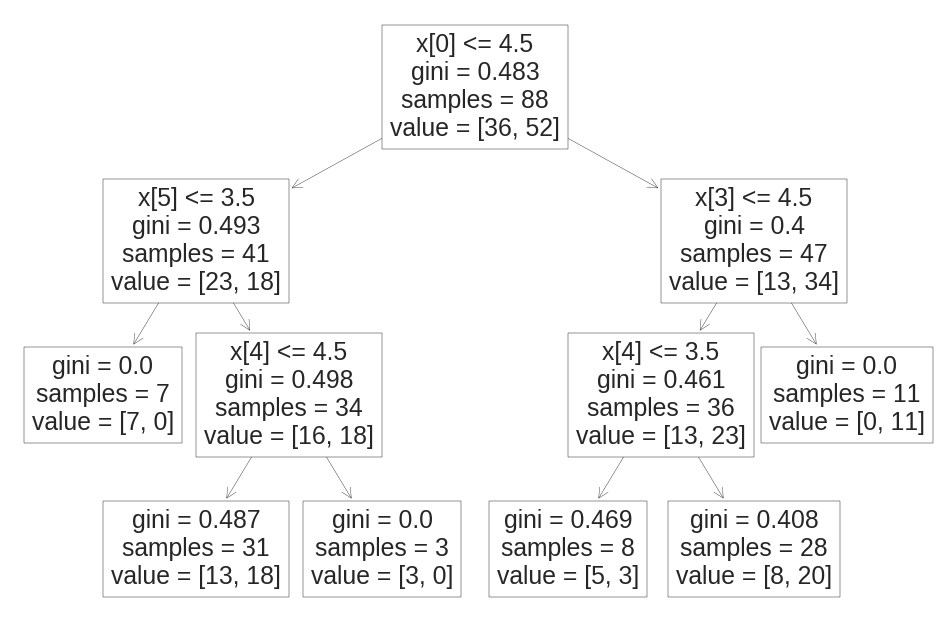

In [91]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

##Visualize decision-trees with graphviz

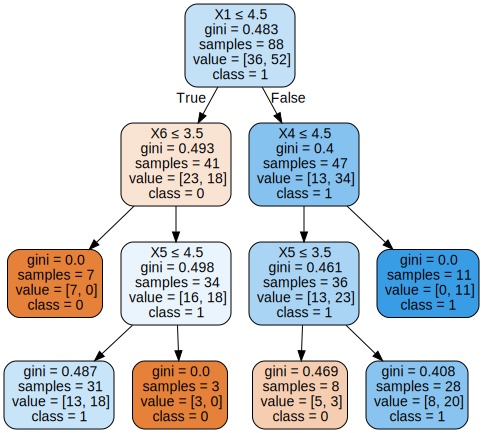

In [92]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=['0','1'] ,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

##Decision Tree Classifier with criterion entropy

In [93]:

# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

##Predict the Test set results with criterion entropy

In [94]:
y_pred_en = clf_en.predict(X_test)

##Check accuracy score with criterion entropy

In [95]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.5526


##Compare the train-set and test-set accuracy

###Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [96]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

###Check for overfitting and underfitting

In [97]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7841
Test set score: 0.5526


###Visualize decision-trees

[Text(0.4642857142857143, 0.9166666666666666, 'x[0] <= 4.5\nentropy = 0.976\nsamples = 88\nvalue = [36, 52]'),
 Text(0.21428571428571427, 0.75, 'x[5] <= 3.5\nentropy = 0.989\nsamples = 41\nvalue = [23, 18]'),
 Text(0.14285714285714285, 0.5833333333333334, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.2857142857142857, 0.5833333333333334, 'x[4] <= 4.5\nentropy = 0.998\nsamples = 34\nvalue = [16, 18]'),
 Text(0.21428571428571427, 0.4166666666666667, 'x[3] <= 4.5\nentropy = 0.981\nsamples = 31\nvalue = [13, 18]'),
 Text(0.14285714285714285, 0.25, 'x[0] <= 2.0\nentropy = 0.971\nsamples = 30\nvalue = [12, 18]'),
 Text(0.07142857142857142, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21428571428571427, 0.08333333333333333, 'entropy = 0.958\nsamples = 29\nvalue = [11, 18]'),
 Text(0.2857142857142857, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.35714285714285715, 0.4166666666666667, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.

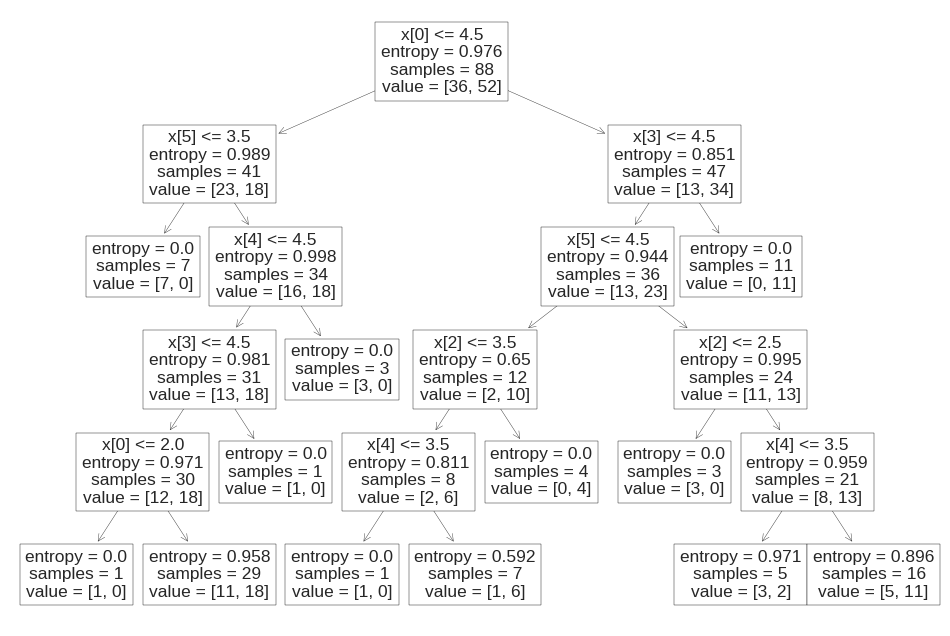

In [98]:

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

###Visualize decision-trees with graphviz

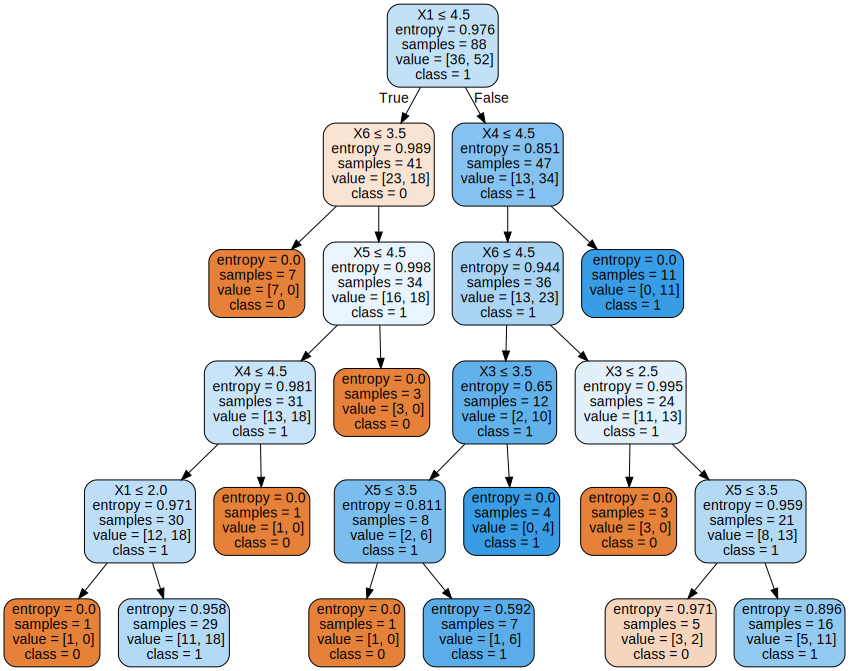

In [99]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=['0','1'],
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

###Confusion matrix

In [100]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 9 12]
 [ 5 12]]


###Classification Report

In [101]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.64      0.43      0.51        21
           1       0.50      0.71      0.59        17

    accuracy                           0.55        38
   macro avg       0.57      0.57      0.55        38
weighted avg       0.58      0.55      0.55        38



###Random Forest Classifier model with default parameters

In [102]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.5000


#Random Forest Classifier model with parameter n_estimators=100

In [103]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)


# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.5000


##Find important features with Random Forest model

In [104]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [105]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

X3    0.184459
X5    0.175602
X2    0.172840
X1    0.163095
X4    0.157796
X6    0.146208
dtype: float64

##Visualize feature scores of the features

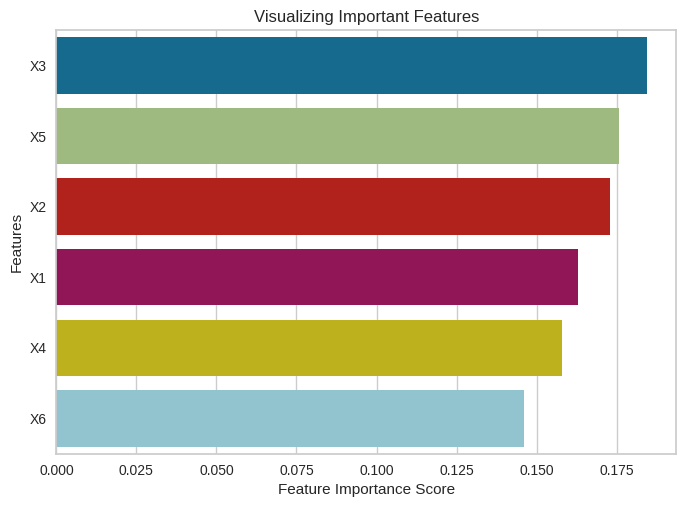

In [106]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

##Build Random Forest model on selected features

In [107]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [108]:
y_pred_train_RF = clf.predict(X_test)

y_pred_train_RF

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

##Confusion matrix

In [109]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_train_RF)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[19  4]
 [ 4 15]]
